In [1]:
import sqlite3
import pandas as pd
con = sqlite3.connect("SQLite/YoutubeStats.sqlite") 
watch_history_all_df = pd.read_sql_query("SELECT * from watch_history", con)
wh_df = watch_history_all_df[watch_history_all_df.is_available == 1]
wh_df.head()

# Data for year range
year_range = (2016, 2016)
year_range_string = str(year_range[0]) if year_range[0]==year_range[1] else f"{year_range[0]} - {year_range[1]}"
label_videos_over_range = f"# of videos watched ({year_range_string})"
# range(year_range[0], year_range[1]+1):
wh_df = wh_df[(year_range[0] <= wh_df.year_date) & (wh_df.year_date <= year_range[1])]
video_count_in_df = len(wh_df.watch_id)

wh_df.describe()

,watch_id,year_date,month_date,day_date,hour_time,day_of_week,is_available
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


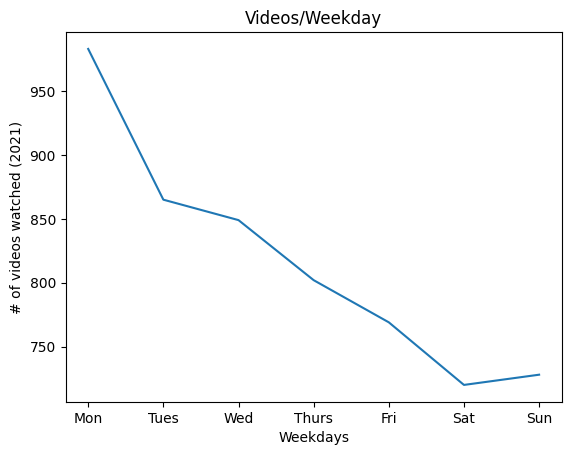

In [181]:
# count how many videos watched every day of the week
weekdays_map = {0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri', 5:'Sat',6:'Sun'}

weekdays_count_df = wh_df["day_of_week"].value_counts().rename_axis('Weekdays').reset_index(name='counts').sort_values('Weekdays')
weekdays_count_df["Weekdays"]=weekdays_count_df["Weekdays"].map(weekdays_map)

# years_range_in_weeks = (year_range[1] - year_range[0] + 1) * 54
# videos_a_week = video_count_in_df / years_range_in_weeks

weekdays_count_df.plot(x="Weekdays", y="counts", title="Videos/Weekday", xlabel = "Weekdays", ylabel=label_videos_over_range).get_legend().remove()

In [207]:
wh_df[wh_df.channel_name == 'Lofi Girl']

,watch_id,date_time_iso,date_,time_,year_date,month_date,day_date,hour_time,day_of_week,title,video_URL,channel_name,channel_url,video_status,is_available
11905,11906,2021-01-14 17:27:00.876,2021-01-14,17:27:00.876000,2021,1,14,17,3,lofi hip hop radio - beats to relax/study to,https://www.youtube.com/watch?v=5qap5aO4i9A,Lofi Girl,https://www.youtube.com/channel/UCSJ4gkVC6NrvI...,Available,1


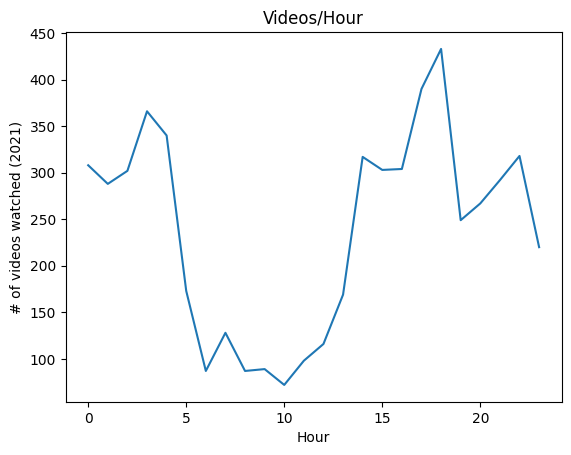

In [182]:
# weekdays_count_df = wh_df["day_of_week"].value_counts().rename_axis('Weekdays').reset_index(name='counts').sort_values('Weekdays')
videos_by_hour = wh_df["hour_time"].value_counts().rename_axis('hour').reset_index(name='count').sort_values('hour')
videos_by_hour.plot(x="hour", y='count', title="Videos/Hour", xlabel = "Hour", ylabel=label_videos_over_range).get_legend().remove()

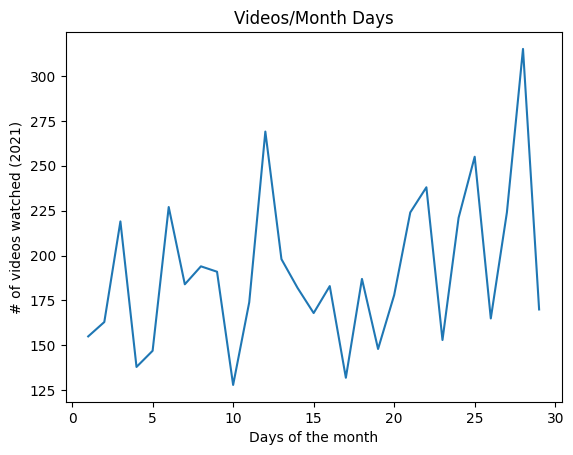

In [178]:
# Count of videos per day of the month, can do same with months
videos_per_day_df = wh_df[wh_df.day_date <= 29] 
videos_per_day_df = videos_per_day_df["day_date"].value_counts().rename_axis('days_number').reset_index(name='count').sort_values('days_number')

videos_per_day_df
plot = videos_per_day_df.plot(x="days_number", y="count", title='Videos/Month Days', xlabel="Days of the month", ylabel = videos_over_range_label).get_legend().remove()


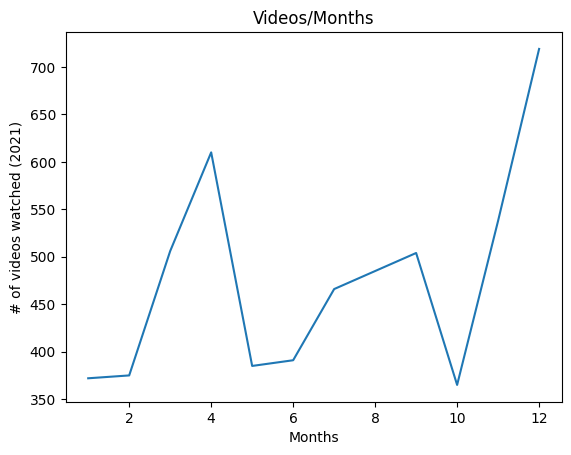

In [183]:
# Count of videos per months
videos_per_month_df = wh_df["month_date"].value_counts().rename_axis('months').reset_index(name='count').sort_values('months')
videos_per_month_df
videos_per_month_df.plot(x="months", y="count", title='Videos/Months', xlabel="Months", ylabel=label_videos_over_range).get_legend().remove()

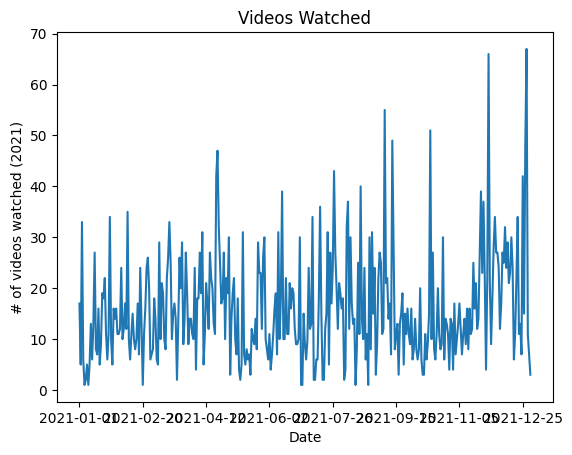

In [186]:
# AVERAGE PER DAY
videos_over_time_df = wh_df["date_"].value_counts().rename_axis('Date').reset_index(name='num_of_videos')
videos_over_time_df = videos_over_time_df.sort_values('Date',ascending=True)
videos_over_time_plot = videos_over_time_df.plot(x="Date", y="num_of_videos", title='Videos Watched', xlabel="Date", ylabel=label_videos_over_range).get_legend().remove()


IndexError: index 0 is out of bounds for axis 0 with size 0

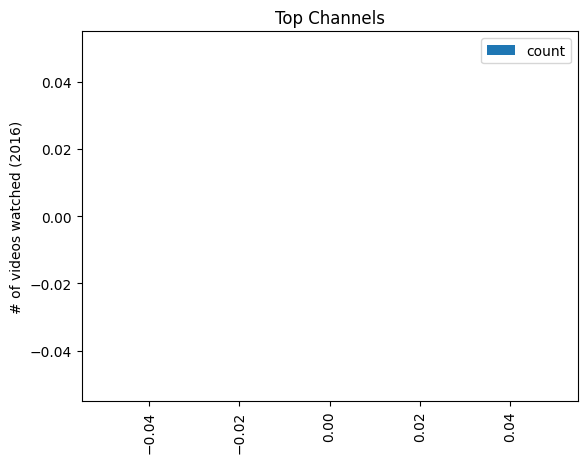

In [2]:
# TOP channels
top_channels_df = wh_df["channel_name"].value_counts().rename_axis('channel_name').reset_index(name='count').sort_values('count', ascending = False)
top_channels_df = top_channels_df.head(10)
top_channels_df.plot.bar(x="channel_name", y="count", title='Top Channels', xlabel="Channel Name", ylabel=label_videos_over_range).get_legend().remove()

In [3]:
# # Normalization no aporta nada
# vot_df = videos_over_time_df["num_of_videos"]
# vot_norm_df = (vot_df - vot_df.mean()) / vot_df.std()
# videos_over_time_df["num_of_vids_normalized"] = vot_norm_df
# videos_over_time_df.plot(x="Date", y="num_of_vids_normalized")
# wh_df[wh_df.date_ == "2022-10-30"]